---
# 대여소와 대중교통 거리 구간별 대여량 분석

이 노트북에서는 **`training_set_station.csv`**와 **`rental_station_summary.csv`** 데이터를 병합하여, 대여소와 **가장 가까운 지하철역**과 **버스정류소** 간 거리와 **대여량**의 관계를 시각화합니다.  
시각화에서는 **지하철역 거리**와 **버스정류소 거리**가 대여량에 미치는 영향을 확인할 수 있습니다.

---


## 1. 데이터 불러오기
우리는 두 개의 CSV 파일을 불러옵니다: `training_set_station.csv` (대여소 정보, 거리 정보 포함)과 `rental_station_summary.csv` (대여소별 대여량 정보).

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# training_set_station.csv: 거리 및 대여소 정보 포함
df_station = pd.read_csv("../data/training_set_station.csv")

# rental_station_summary.csv: 대여소별 대여량 정보
df_rental = pd.read_csv("../data/rental_station_summary.csv")

# station_id와 rental_station_id가 동일한 대여소 병합
df_merged = pd.merge(df_station, df_rental, left_on="station_id", right_on="rental_station_id", how="inner")

# 병합된 데이터 확인 (디버깅용)
print("\n[merged data sample]\n", df_merged[['station_id', 'subway_dist_min', 'bus_dist_min', 'total_rental_count']].head())



[merged data sample]
   station_id  subway_dist_min  bus_dist_min  total_rental_count
0      ST-10           456.72        115.66             20100.0
1    ST-1000           258.77         10.49             23358.0
2    ST-1002           621.65         91.85             41276.0
3    ST-1003          1116.34         68.16              9672.0
4    ST-1004          2049.16         51.71              7635.0


---
## 2. 시각화
- **지하철역 거리**와 **버스정류소 거리**에 따른 **대여량**의 관계를 시각화합니다.
- 각 대여소에 대해 **연평균 대여량**을 측정하고, 이를 거리와 함께 비교합니다.

---

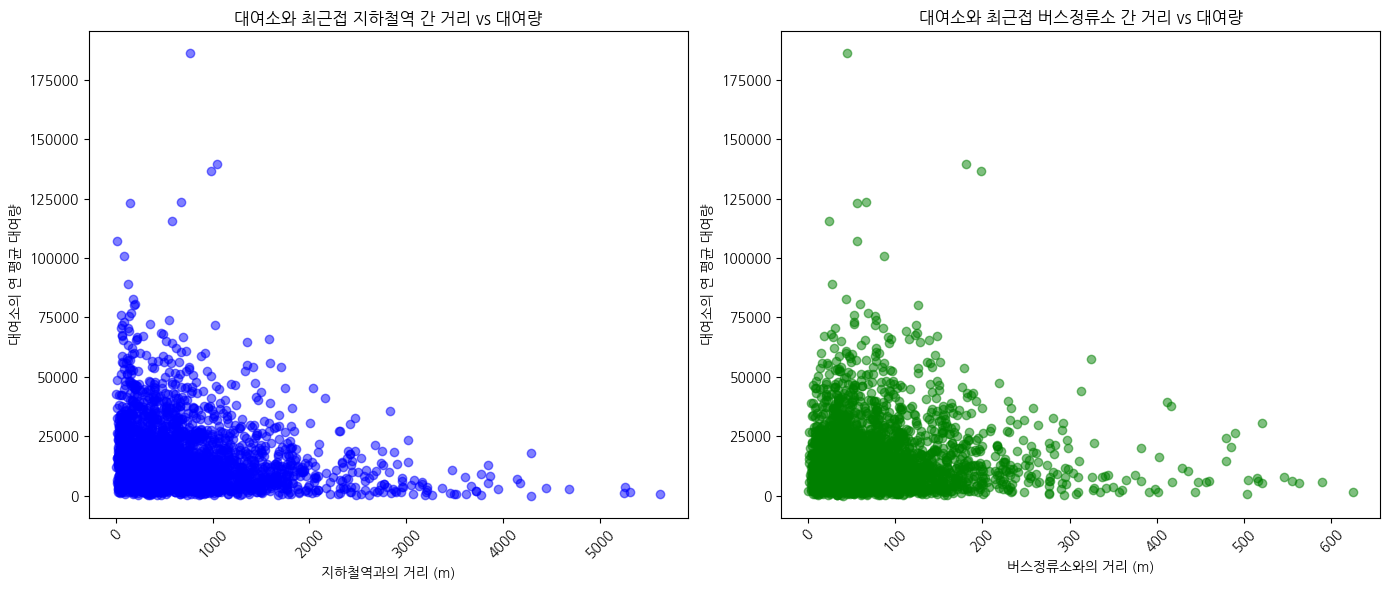

In [3]:
# 지하철 거리 vs 대여량 (연 평균 대여량)
subway_dist = df_merged['subway_dist_min']
subway_bike_count = df_merged['total_rental_count']

# 버스 거리 vs 대여량 (연 평균 대여량)
bus_dist = df_merged['bus_dist_min']
bus_bike_count = df_merged['total_rental_count']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 지하철 거리 vs 평균 대여량
axes[0].scatter(subway_dist, subway_bike_count, color='blue', alpha=0.5)
axes[0].set_title('대여소와 최근접 지하철역 간 거리 vs 대여량')
axes[0].set_xlabel('지하철역과의 거리 (m)')
axes[0].set_ylabel('대여소의 연 평균 대여량')
axes[0].tick_params(axis='x', rotation=45)

# 버스 거리 vs 평균 대여량
axes[1].scatter(bus_dist, bus_bike_count, color='green', alpha=0.5)
axes[1].set_title('대여소와 최근접 버스정류소 간 거리 vs 대여량')
axes[1].set_xlabel('버스정류소와의 거리 (m)')
axes[1].set_ylabel('대여소의 연 평균 대여량')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 2-1. 시각화 수정
- 이전에는 모든 점의 좌표가 표시되었으나, **구간별로 나누어 평균 대여량**을 계산하여 시각화를 수정했습니다.
- 각 대여소에 대해 **연평균 대여량**을 구간별로 측정하고, 이를 거리 구간과 함께 비교합니다.
---


/tmp/ipykernel_59252/1590421879.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subway_grouped = df_merged.groupby('subway_bin')['total_rental_count'].mean().reset_index()
/tmp/ipykernel_59252/1590421879.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bus_grouped = df_merged.groupby('bus_bin')['total_rental_count'].mean().reset_index()


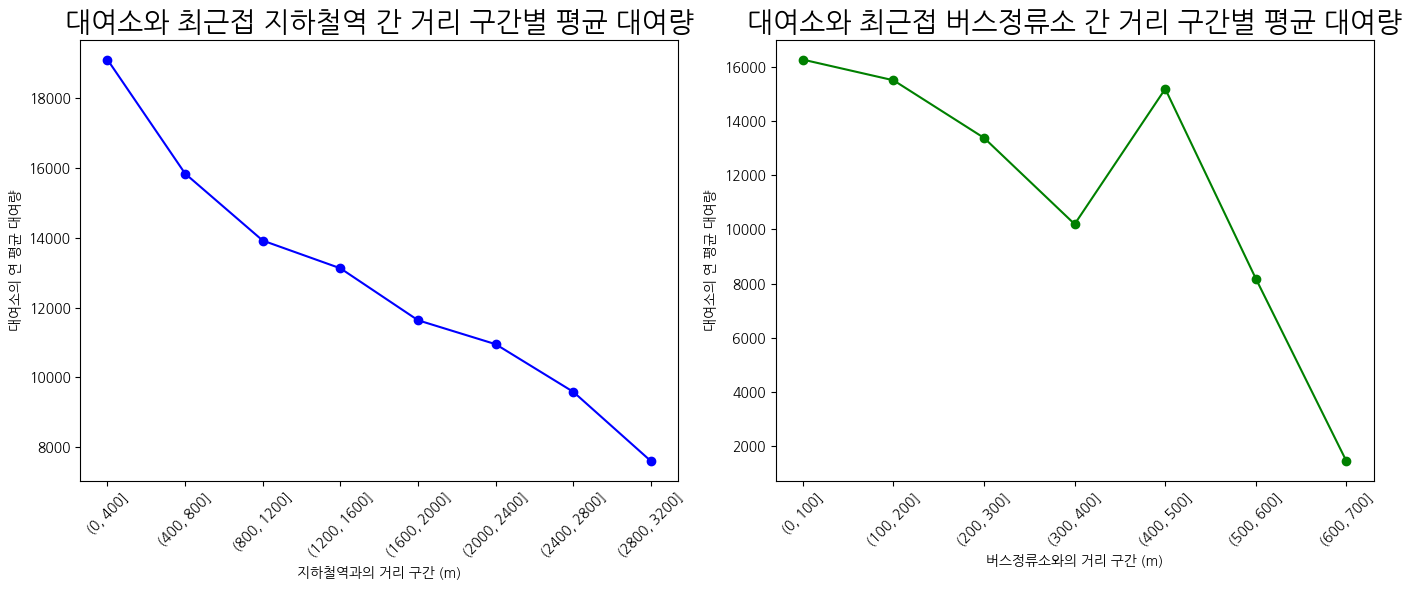

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 지하철 거리 구간 (예: 0~5000m, 500m 간격)
subway_bins = np.arange(0, 3600, 400)
subway_labels = [f"({subway_bins[i]}, {subway_bins[i+1]}]" for i in range(len(subway_bins)-1)]
df_merged['subway_bin'] = pd.cut(df_merged['subway_dist_min'], bins=subway_bins, labels=subway_labels, include_lowest=True)

# 버스 거리 구간 (예: 0~600m, 100m 간격)
bus_bins = np.arange(0, 800, 100)
bus_labels = [f"({bus_bins[i]}, {bus_bins[i+1]}]" for i in range(len(bus_bins)-1)]
df_merged['bus_bin'] = pd.cut(df_merged['bus_dist_min'], bins=bus_bins, labels=bus_labels, include_lowest=True)

# 지하철 거리 구간별 평균 대여량
subway_grouped = df_merged.groupby('subway_bin')['total_rental_count'].mean().reset_index()

# 버스 거리 구간별 평균 대여량
bus_grouped = df_merged.groupby('bus_bin')['total_rental_count'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 지하철 거리 구간별 평균 대여량 시각화
axes[0].plot(subway_grouped['subway_bin'], subway_grouped['total_rental_count'], marker='o', color='blue')
axes[0].set_title('대여소와 최근접 지하철역 간 거리 구간별 평균 대여량', fontsize=20)
axes[0].set_xlabel('지하철역과의 거리 구간 (m)')
axes[0].set_ylabel('대여소의 연 평균 대여량')
axes[0].tick_params(axis='x', rotation=45)

# 버스 거리 구간별 평균 대여량 시각화
axes[1].plot(bus_grouped['bus_bin'], bus_grouped['total_rental_count'], marker='o', color='green')
axes[1].set_title('대여소와 최근접 버스정류소 간 거리 구간별 평균 대여량', fontsize=20)
axes[1].set_xlabel('버스정류소와의 거리 구간 (m)')
axes[1].set_ylabel('대여소의 연 평균 대여량')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
